In [1]:
using Plots
using Distributions
#pyplot()


## 抽样误差
由于抽样引起的样本的统计量与总体参数间的差异

个体差异与抽样。

### 标准误 SE
对于抽样前而言，样本均数取值是随机的，样本均数总是在总体均数附近随机波动，波动幅度随着样本量的增大而减小，样本均数的标准差与样本量大小有关，也与抽样总体的标准差有关。

if $x \sim \mathcal{N}(\mu, \sigma^2)$, then $\bar{X} \sim \mathcal{N}(\mu, \sigma_{\bar{X}}^2)$.

$$\sigma_{\bar{X}}^2 = \frac{\sigma^2}{n}, \quad S_{\bar{x}}^2 = \frac{S^2}{n}$$

further: $\sigma_{\bar{X}}^2 = \frac{\sigma^2}{n}$ is general, independent with types of distributions

反应样本均数的离散程度，也反应了抽样误差的大小。

其中$\sigma_{\bar{x}}$称为样本均数的理论标准误。而$S_{\bar{x}}$称为样本均数的估计标准误。

### 中心极限定理 CLT

个体资料X服从偏态的分布，当样本量n较大时，样本均数$\bar{x}$近似服从正态分布。
可以来求样本均数的变异情况。即使对总体的精确分布不清楚，也可以利用对分布参数以及相应的抽样分布规律进行研究。

- 从均数为$\mu$，标准差为$\sigma$的正态分布总体中进行随机抽样，样本均数将服从均数为$\mu$，标准差为$\sigma_{\bar{x}}$的正态分布$\mathcal{N}(\mu, \frac{\sigma^2}{n})$，或表示为$\mathcal{N}(\mu, \sigma_{\bar{X}}^2)$
- 从均数为$\mu$，标准差为$\sigma$的任意非正态总体中进行随机抽样，随着样本量的增加，样本均数的分布将越来越接近$\mathcal{N}(\mu, \sigma_{\bar{X}}^2)$


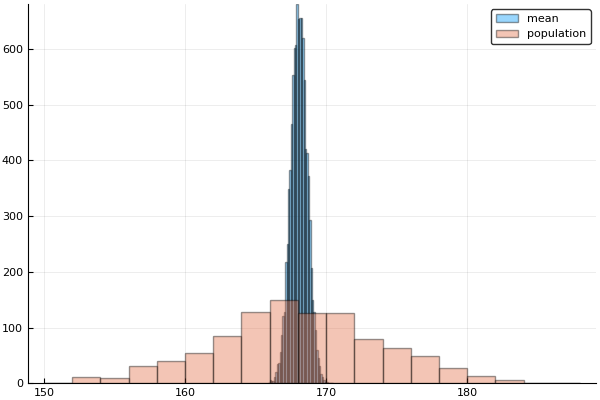

In [17]:
n = 10000
sample_std = zeros(n)
population = rand(Normal(168.15,6),1000)
for i = 1:n
    pooled = rand(population, 100);
    sample_std[i] = mean(pooled)
end
histogram(sample_std, label="mean",alpha=0.4)
histogram!(population, label="population",alpha=0.4)

## 样本率的分布
总体率由样本率来估计。

样本率本身就是一个均数的概念。

e.g. 对于Binomial分布，$Var(p) = \frac{Var(x)}{n^2} $

$$\mu_P = \pi$$

$$\sigma_P = \sqrt{\frac{\pi (1-\pi)}{n}} $$

# t分布
实际研究中，$\sigma$未知，用样本的标准差来替代。

$$ t = \frac{\bar{X} - \mu}{S / \sqrt{n}} \sim t(\nu)$$

自由度 $\nu = n-1$

## 特征
1. t分布的曲线形态仅受自由度的影响。
2. 当自由度无穷大时，t分布变为了标准正态分布。


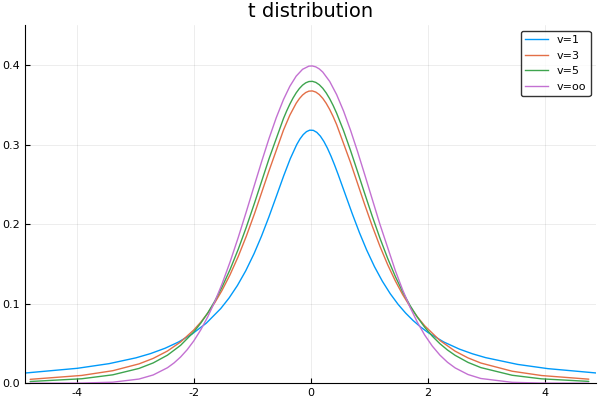

In [31]:
plot(x->pdf(TDist(1),x), label="v=1")
plot!(x->pdf(TDist(3),x), label="v=3")
plot!(x->pdf(TDist(5),x), label="v=5")
plot!(x->pdf(Normal(),x), label="v=oo")
plot!(ylim=(0,0.45), title="t distribution")

# $\chi^2$分布

若随机变量Z服从标准正态分布，则其平方将服从自由度为1的$\chi^2$分布。若随机变量X服从正态分布$\mathcal{N}(\mu, \sigma^2)$且相互独立，则
$$ \frac{1}{\sigma^2} \sum_{i=1}^n (X_i - \mu)^2 \sim \chi^2(n) $$

$$ \frac{(n-1)}{\sigma^2} S^2 = \sum_{i=1}^n \frac{(X_i - \bar{X})^2}{\sigma^2} \sim \chi^2(n-1) $$

## 特征
1. 为一簇单峰正偏态分布曲线，且随自由度的增加，正偏的程度越来越小。


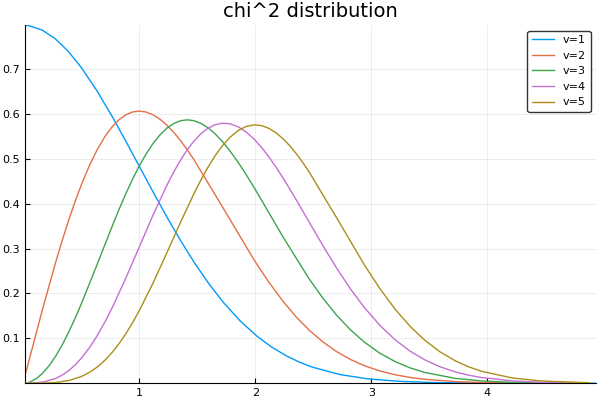

In [36]:
plot(x->pdf(Chi(1),x), label="v=1")
plot!(x->pdf(Chi(2),x), label="v=2")
plot!(x->pdf(Chi(3),x), label="v=3")
plot!(x->pdf(Chi(4),x), label="v=4")
plot!(x->pdf(Chi(5),x), label="v=5")
plot!(title="chi^2 distribution")

# F分布

--- 

# 参数估计

- 点估计
- 区间估计
均数的抽样分布(t分布)。
    - 可信区间
    $$ P(-t_{\alpha/2, v} < t < t_{\alpha/2, v}) = 1 - \alpha$$
    
#### 均数差的可信区间
假定两组的方差是齐的，且数据相互独立，为正态。
合并方差：
$$ s_c^2 = \frac{(n_1-1)s_1^2 + (n_2-1s_2^2)}{n_1+n_2-2} $$

均数差的标准误：
$$ s_{\bar{X}_1 - \bar{X}_2} = \sqrt{s_c^2 (\frac{1}{n_1} - \frac{1}{n_2})} $$

标准差 标准误
